# My attempt at Case Study 1:

In [1]:
# Play a card game in which the cards are iteratively flipped until we tell the dealer to stop, then one additional card is flipped over
# Find a strategy to make the last card flipped over a red card
# I have already seen this before, so will try a strategy I think I saw before

In [4]:
# Make The Deck:
red_cards = 26 * [1]
black_cards = 26 * [0]
full_deck = red_cards + black_cards

In [5]:
# Get all permutations with NumPy:
import numpy as np
np.random.seed(0)
shuffled_deck = np.random.permutation(full_deck)

In [6]:
print(shuffled_deck)
print(type(shuffled_deck))

[0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0]
<class 'numpy.ndarray'>


In [1]:
# Play the game where we will keep track of the number of black and red cards remaining in the deck
# and stop the game when the number of red cards outnumbers the number of black cards:
# this function will return 1 if the game is won and 0 if the game is lost
def play_game(shuffled_deck):  
    red_total = 26
    black_total = 26
    final_card = shuffled_deck[0]
    for index, card in np.ndenumerate(shuffled_deck):
        if card == 1:
            red_total -= 1
        else:
            black_total -= 1

        if red_total > black_total:
            # halt the game because there are more red cards than black cards
            final_card = shuffled_deck[index[0] + 1]
            print("Halted")
            break
            
        # record the last card in case there are never more red cards than black cards
        final_card = card
    
    print("Final Check")
    if final_card == 1:
        return 1
    else:
        return 0

In [6]:
print(play_game(shuffled_deck))

0


In [20]:
from collections import defaultdict


In [22]:
np.random.seed(0)
# counters for the wins and losses
num_wins = 0
num_losses = 0

# play 100 games with a random deck and record it
for _ in range(100):
    shuffled_deck = np.random.permutation(full_deck)
    # print(shuffled_deck)
    if play_game(shuffled_deck) == 1:
        num_wins += 1
    else:
        num_losses += 1
        
print(num_wins)
print(num_losses)

58
42


# Case Study 1 Solution

In [32]:
# 4.1 Predicting Red Cards in a Shuffled Deck
red_cards = 26 * [1]
black_cards = 26 * [0]
total_cards = red_cards + black_cards

In [10]:
import numpy as np
# Shuffle the deck
np.random.seed(1)
shuffled_deck = np.random.permutation(total_cards)

In [11]:
# Terminate the game when the number of red cards is greater than the number of black cards
remaining_red_cards = 26
for i, card in enumerate(shuffled_deck[:-1]):
    remaining_red_cards -= card
    remaining_total_cards = 52 - i - 1
    if (remaining_red_cards / remaining_total_cards) > 0.5:
        break
        
print(f"Stopping the game at index {i}.")
final_card = shuffled_deck[i + 1]
color = 'red' if final_card else 0
print(f"The next card in the deck is {'red' if final_card else 'black'}.")
print(f"We have {'won' if final_card else 'lost'}!")

Stopping the game at index 0.
The next card in the deck is red.
We have won!


In [14]:
# Generalizing the Card Game Strategy
np.random.seed(0)
total_cards = 52
total_red_cards = 26
def execute_strategy(min_fraction_red=0.5, shuffled_deck=None, return_index=False):
    if shuffled_deck is None:
        unshuffled_deck = (26 * [1]) + (26 * [0])
        shuffled_deck = np.random.permutation(unshuffled_deck)
        
    remaining_red_cards = total_red_cards
    
    for i, card in enumerate(shuffled_deck[:-1]):
        remaining_red_cards -= card
        fraction_red_cards = remaining_red_cards / (total_cards - i - 1)
        if fraction_red_cards > min_fraction_red:
            break
        
    # returns either the return index and the final card as a tuple: (return_index, final card) or just the final card
    # depending on the return_index input parameter
    return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1]

In [15]:
# 4.1.1 Estimating the probability of strategy success
# Apply the strategy to 1000 random shuffles
observations = np.array([execute_strategy() for _ in range(1000)])

In [16]:
# Compute the frequency of wins
frequency_wins = observations.sum() / 1000
assert frequency_wins == observations.mean()
print(f"The frequency of wins is {frequency_wins}")

The frequency of wins is 0.511


In [17]:
# Computing total profit
dollars_won = frequency_wins * 1000
dollars_lost = (1 - frequency_wins) * 1000
total_profit = dollars_won - dollars_lost
print(f"Total profit is ${total_profit:.2f}")

Total profit is $22.00


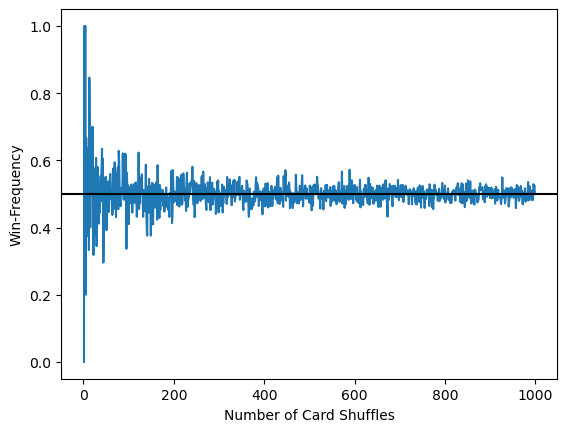

The win-frequency for 10,000 shuffles is 0.5035035035035035


In [19]:
import matplotlib.pyplot as plt
# Plotting over a series of sample sizes ranging from 1 through 10000
np.random.seed(0)
def repeat_game(number_repeats):
    observations = np.array([execute_strategy() for _ in range(number_repeats)])
    return observations.mean()

frequencies = []
for i in range(1, 1000):
    frequencies.append(repeat_game(i))
    
plt.plot(list(range(1, 1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Card Shuffles')
plt.ylabel('Win-Frequency')
plt.show()
print(f"The win-frequency for 10,000 shuffles is {frequencies[-1]}")

In [20]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < (likelihoods.size - 1):
            end_index += 1
            
        area = likelihoods[start_index : end_index + 1].sum() * bin_width

    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start} - {range_end}"
    print(f"The frequency range {range_string} represents a {100 * area:.2f}% confidence interval")
    return start_index, end_index

The frequency range 0.46475 - 0.5335000000000001 represents a 97.00% confidence interval


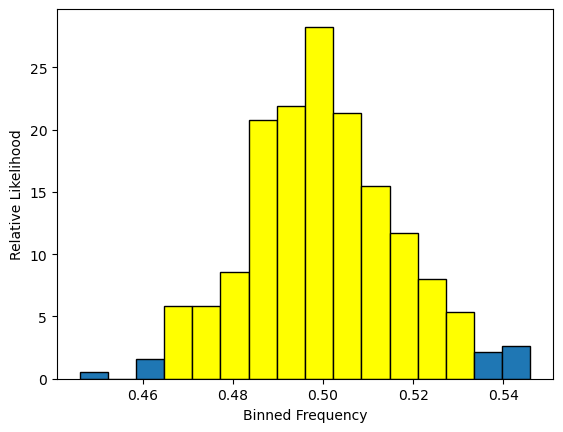

In [21]:
# Compute a confidence interval for 3 million shuffles
np.random.seed(0)
frequency_array = np.array([repeat_game(1000) for _ in range(300)])

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='k', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

In [ ]:
# ***********************************
# This code will take an hour to run
# ***********************************
# Compute a confidence interval for 150 million shuffles
np.random.seed(0)
frequency_array = np.array([repeat_game(50000) for _ in range(3000)])

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='k', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

In [ ]:
# ***********************************
# This code will take an hour to run
# ***********************************
# Compute a confidence interval for 150 million shuffles with a min_red_fraction >0.75
np.random.seed(0)
def repeat_game(number_repeats, min_red_fraction):
    observations = np.array([execute_strategy(min_red_fraction) for _ in range(number_repeats)])
    return observations.mean()

np.random.seed(0)
frequency_array = np.array([repeat_game(50000, 0.75) for _ in range(3000)])

likelihoods, bin_edges, = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

In [26]:
def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])



def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    
    # check to see if its a generic set and not a dictionary
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    
    # otherwise, deal with the weights of the in the sample space dictionary
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    
    return event_size / sum(generic_sample_space.values())

import itertools

In [27]:
# 4.2 Optimizing strategies using the sample space for a 10-card deck
total_cards = 10
total_red_cards = int(total_cards / 2)
total_black_cards = total_red_cards
unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
win_condition = lambda x: execute_strategy(shuffled_deck = np.array(x))
prob_win = compute_event_probability(win_condition, sample_space)
print(f"Probability of a win is {prob_win}")

Probability of a win is 0.5


In [29]:
# Trying out different min_red_fractions from 0.5 to 1.0
def scan_strategies():
    fractions = [value for value in range(50, 100)]
    probabilities = []
    for frac in fractions:
        win_condition = lambda x: execute_strategy(frac, shuffled_deck = np.array(x))
        probabilities.append(compute_event_probability(win_condition, sample_space))
        
    return probabilities

probabilities = scan_strategies()
print(f"Lowest probability of win is {min(probabilities)}")
print(f"Highest probability of win is {max(probabilities)}")
# The different strategies do not affect the outcome

Lowest probability of win is 0.5
Highest probability of win is 0.5


In [31]:
# Trying out different deck sizes
for total_cards in [2, 4, 6, 8]:
    total_red_cards = int(total_cards / 2)
    total_black_cards = total_red_cards
    unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
    
    sample_space = set(itertools.permutations(unshuffled_deck))
    probabilities = scan_strategies()
    if all(prob == 0.5 for prob in probabilities):
        print(f"No winning strategy found for deck of size {total_cards}")
    else:
        print(f"Winning strategy found for deck of size {total_cards}")

No winning strategy found for deck of size 2
No winning strategy found for deck of size 4
No winning strategy found for deck of size 6
No winning strategy found for deck of size 8


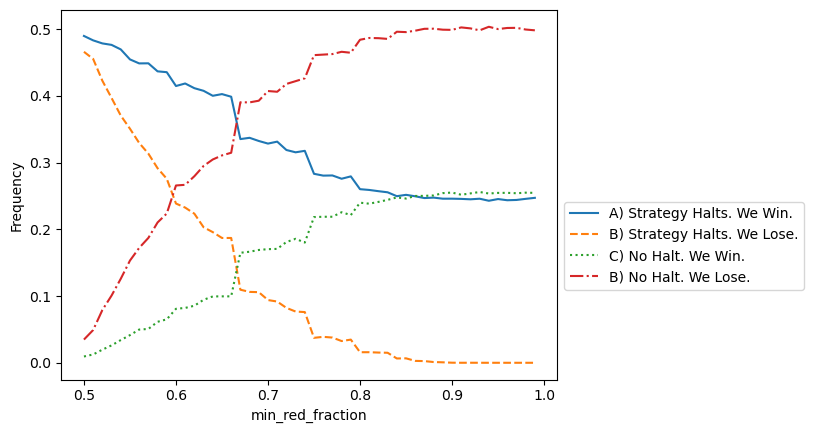

In [38]:
# min_red_fraction plotted against sampled frequencies for all four possible scenarios:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
unshuffled_deck = red_cards + black_cards

def repeat_game_detailed(number_repeats, min_red_fraction):
    observations = [execute_strategy(min_red_fraction, return_index=True) for _ in range(number_repeats)]
    successes = [index for index, card, in observations if card == 1]
    halt_success = len([index for index in successes if index != 51])
    no_halt_success = len(successes) - halt_success
    
    failures = [index for index, card, in observations if card == 0]
    halt_failure = len([index for index in failures if index != 51])
    no_halt_failure = len(failures) - halt_failure
    result = [halt_success, halt_failure, no_halt_success, no_halt_failure]
    return [r / number_repeats for r in result]

fractions = [value / 100 for value in range(50, 100)]
num_repeats = 50000
result_types = [[], [], [], []]

for fraction in fractions:
    result = repeat_game_detailed(num_repeats, fraction)
    for i in range(4):
        result_types[i].append(result[i])
        
plt.plot(fractions, result_types[0], label='A) Strategy Halts. We Win.')
plt.plot(fractions, result_types[1], linestyle='--', label='B) Strategy Halts. We Lose.')
plt.plot(fractions, result_types[2], linestyle=':', label='C) No Halt. We Win.')
plt.plot(fractions, result_types[3], linestyle='-.', label='B) No Halt. We Lose.')
plt.xlabel('min_red_fraction')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

In [42]:
# The probabilities even out to be 0.5 win/loss no matter what strategy we choose
# This is because of the random shuffles every time we play

# Therefore the optimal strategy is just to pick the first card as it is the fastes way to see
# if we won or lost the 50/50 flip

In [41]:
# Optimal Winning Strategy:
def optimal_strategy(shuffled_deck):
    return shuffled_deck[0]